In [26]:

import numpy as np
import matplotlib.pyplot as plt
import random


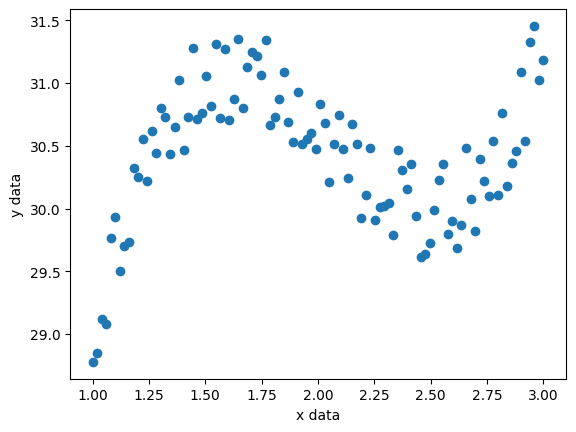

In [27]:
# experimental data generator - with random noise added

def eq(x):

    a = 3
    b = 4
    c = 0
    d = 30
    e = 2.5
    f_x = a*(x-e)**3 + b*(x-e)**2 + c*(x-e) + d

    return f_x

def add_noise(y):

    rand = np.random.uniform(-0.4,0.4,len(y))

    y_noise = rand + y

    return y_noise


x_domain = np.linspace(1,3,100)
y_domain = eq(x_domain)
y_domain_w_noise = add_noise(y_domain)

def plot():
    
    #plt.plot(x_domain,y_domain)
    plt.scatter(x_domain,y_domain_w_noise)
    plt.xlabel('x data')
    plt.ylabel('y data')
    plt.show()
    
plot()

In [28]:
#nxn system of eq solver
#Using nested for - for loops

def system_nxn(test_arr,row_vector):

    def adjoint_matrix(A):

        def find_minor(col,row,A):

            B = np.delete(A,col, axis = 1)
            B = np.delete(B,row,axis = 0)

            return B
        
        list_1 = []
        for a in range (len(A)):

            for b in range (len(A)):

                co = (-1)**(a + b)

                minor = find_minor(a,b,A)
                    
                det_value = np.linalg.det(minor)

                list_1.append(det_value * co)
        
        list_2 = []
        c = 0
        d = len(A)
        while len(list_2) < len(A):

            arr_elem = list_1[c:d]
            list_2.append(arr_elem)

            c = d 
            d = d + len(A)
        
        return np.array(list_2)

    def inverse_matrix(A):

        det_value = np.linalg.det(A)

        inverse = adjoint_matrix(A)

        matrix = inverse/det_value

        return matrix

    def sqaure_row_x(test_arr,row_vector):
        
        list_0 = np.array([0] * len(row_vector))

        for a in range (len(row_vector)):

            list_1 = []

            for b in range (len(row_vector)):

                value = row_vector[a]*test_arr[b,a]
                list_1.append(value)

            list_0 = np.column_stack((list_0,list_1))
            list_final = np.delete(list_0, 0, axis = 1)

        list_2 = []

        for c in range (len(row_vector)):
                
            value = np.sum(list_final[c])
            list_2.append(value)
            
        return np.array(list_2)

    invese = inverse_matrix(test_arr)

    solution = sqaure_row_x(invese,row_vector)

    return solution


[  3.02859396 -18.70879118  36.6965165    7.81929861]
R^2 = 0.8152566395478646


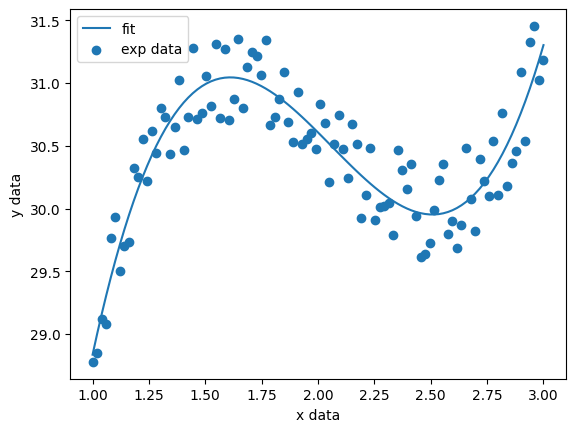

In [29]:
#poly fit where user can choose degree
#outputs the coefficents in order of heighest degree to lowest, R^2 and the fit for the input data

def poly_fit(degree,x_val,y_val):

    mat_len = degree + 1

    def poly_arr(mat_len,x_val,y_val):

        list_0 = np.array([0] * mat_len)
        y_arr = []
        for a in range (mat_len):

            highest_power = 2*degree - a
            list_1 = []
            
            for b in range (mat_len):

                app_power = highest_power - b
                value = np.sum(x_val**app_power)
                list_1.append(value)
                

            list_0 = np.column_stack((list_0,list_1))
            x_arr = np.delete(list_0, 0, axis = 1)

            row_highest_power = degree - a
            value = np.sum(y_val * (x_val**row_highest_power))
            y_arr.append(value)

        return x_arr, y_arr

    x_arr, y_arr = poly_arr(mat_len,x_val,y_val)

    coeff = system_nxn(x_arr,y_arr)
    print(coeff)

    def f_x(co,degree,x_val):

        list_0 = []
        for a in range (len(x_val)):
            x_value = x_val[a]
            list_1 = []

            for b in range (degree + 1):
                i = b + 1
                value = co[-i]*(x_value)**b
                list_1.append(value)

            list_0.append(np.sum(list_1))

        return list_0

    y_fit = f_x(coeff,degree,x_val)

    def R_sq(y_val,y_fit):

        y_val = np.array(y_val)
        y_fit = np.array(y_fit)

        var_mean = np.sum((y_val - np.sum(y_val)/len(y_val))**2)
        var_fit = np.sum((y_val - y_fit)**2)

        value = 1 - var_fit/var_mean

        return value

    R_sqaured = R_sq(y_val,y_fit)
    print(f'R^2 = {R_sqaured}')

    return y_fit

y_fit = poly_fit(3,x_domain,y_domain_w_noise)  

'''
def R_sq_base(y_val,y_fit):
    
    y_val = np.array(y_val)
    y_fit = np.array(y_fit)

    var_mean = np.sum((y_val - np.sum(y_val)/len(y_val))**2)
    var_fit = np.sum((y_val - y_fit)**2)

    value = 1 - var_fit/var_mean

    return value

R_sq_base = R_sq_base(y_domain_w_noise,y_domain)
print(R_sq_base)
'''

def plot():

    plt.plot(x_domain,y_fit,label = 'fit')
    plt.scatter(x_domain,y_domain_w_noise, label = 'exp data')
    plt.legend(loc = 'upper left')
    plt.xlabel('x data')
    plt.ylabel('y data')
    plt.show()

plot()
